## XGBOOST Practice

### Load in the data set
In this practice, we will be using XGBoost with Python to build a supervised learning system that predicts the housing prices of Boston in the past. 

This is an infamous dataset that has been used in many machine learning papers. The original data is constructed by the paper "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.

We fisrt load the dataset from sklearn package.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We then construct a pandas dataset with the price and all the features. 

In [39]:
import pandas as pd

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

df_boston[, 1]

SyntaxError: invalid syntax (<ipython-input-39-8722814cfaa9>, line 7)

### Simple XGBoost with CV
Load in XGBoost Packages and select out features (the first 13 columns) and labels (the last column). 

In [62]:
import xgboost as xgb

#data = pd.DataFrame(boston.data,columns=boston.feature_names)
#label = pd.Series(boston.target)

X = df_boston.iloc[:,0:14]
y = df_boston.iloc[:,-1]

#print(data.head())
#print(label.head())

data_dmatrix = xgb.DMatrix(data=X, label=y)


You then define the cross validation parameters and get the cross valudation results using [xgb.cv()](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

The important parameters that you need to define as:
1. **learning_rate**: step size shrinkage used to prevent overfitting. Range is [0,1]
2. **max_depth**: determines how deeply each tree is allowed to grow during any boosting round.
3. **objective**: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
4. **alpha**: L1 regularization on leaf weights. A large value leads to more regularization.
5. **colsample_bytree**: percentage of features used per tree. High value can lead to overfitting.


Let us first use "reg:lienar" as objective, colsample_bytree = 0.3, learning_rate = 0.1, max_depth=5 and alpha=10.

In the cross validation, you need to specify:
1. **num_boost_round**: denotes the number of trees you build (analogous to n_estimators)
2. **metrics**: tells the evaluation metrics to be watched during CV
3. **as_pandas**: to return the results in a pandas DataFrame.
4. **early_stopping_rounds**: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
5. **seed**: for reproducibility of results.

We will use num_boost_rounds=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, sead=123, nfolds=5.

In [63]:
param = {}

param['learning_rate'] = 0.1
param['max_depth'] = 5
param['objective'] = 'reg:linear'
param['alpha'] = 10
param['colsample_bytree'] = 0.3

cv_results = xgb.cv(param, data_dmatrix, num_boost_round=150, early_stopping_rounds=10, nfold=5, metrics = 'rmse', seed=123)

[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 

[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:48:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end

[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:48:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end

Visualize the cross validation results using the dataset cv_results.

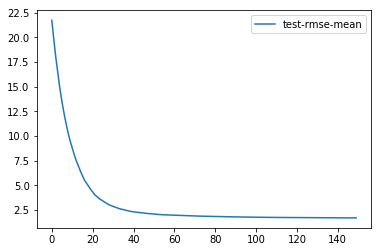

In [54]:
%matplotlib inline
cv_results.plot(y='test-rmse-mean')

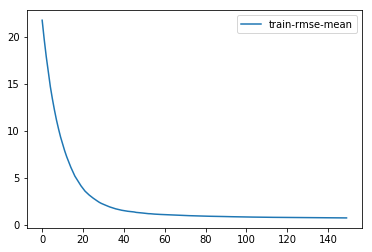

In [55]:
%matplotlib inline
cv_results.plot(y='train-rmse-mean')

In [56]:
data['price'].mean()

22.532806324110698

### XGBoost with Parameter Tuning

Let us then start tuing the parameters of XGBoost. For more information on which parameters to tune, read the following documents: https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In this part, you need to create a grid of parameters you want to search, and use CV to fine tune the parameters. You will then read your cross-validation results. 

You can use a for-loop to tune the parameters. You can also use "from sklearn.grid_search import GridSearchCV" to tune your parameters. (For-loop is recommended).

In [64]:
for i in [0.1, 0.2]:
    param['learning_rate'] = i

    cv_results = xgb.cv(param, data_dmatrix, num_boost_round=150, early_stopping_rounds=10, nfold=5, metrics = 'rmse', seed=123)
    min_error = cv_results['test-rmse-mean'].min()
    print(min_error)

TypeError: cv() got an unexpected keyword argument 'verbosity'